# 데이터 불러오기

In [1]:
import pandas as pd

# CSV 파일 읽기
df_sensor = pd.read_csv('../src/merged_data.csv')

# (1) 이진 변수 판별: "해당 컬럼의 유일한 값이 {0, 1}만 존재"하는 경우
binary_cols = [
    col for col in df_sensor.columns 
    if set(df_sensor[col].dropna().unique()) == {0, 1}
]

# (2) 이진 변수를 제외한 새로운 데이터프레임
df_sensor_nonbinary = df_sensor.drop(columns=binary_cols)

# 결과 확인
df_sensor_nonbinary.head()
print(df_sensor_nonbinary['label'].value_counts())


label
0    47413
1    46716
4    41296
3    34791
2    34751
Name: count, dtype: int64


In [2]:
from sklearn.model_selection import train_test_split

X, y = df_sensor_nonbinary.iloc[:, :-1].values, df_sensor_nonbinary.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [5]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 준비합니다
    colors = ['r', 'b', 'g', 'c', 'm']  # 예: 빨강, 파랑, 초록, 청록, 자홍
    markers = ['o', 's', '^', 'v', 'x'] # 예: 원, 사각, 삼각, 아래삼각, x표
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 클래스별로 샘플을 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

c:\Users\iinmv\anaconda3\envs\nuclear_bootcamp\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\iinmv\AppData\Local\Temp\ipykernel_9292\1948565302.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


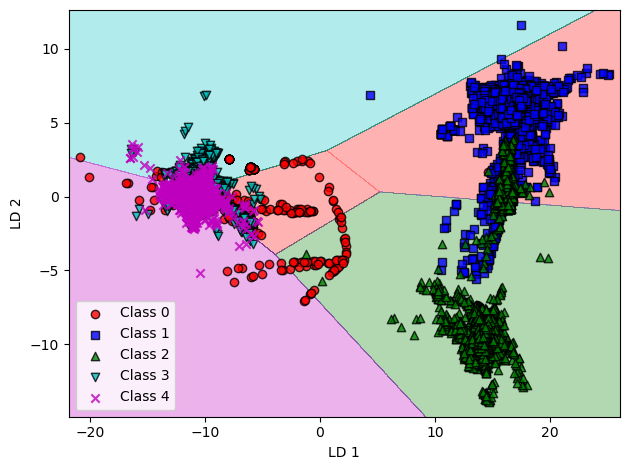

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_09.png', dpi=300)
plt.show()